# Importing Libraries

In [1]:
# data processing
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style


# Algorithms
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
sbi=pd.read_csv("SBI_Life_Insurance.csv")

In [3]:
sbi.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


age : age of policyholder

sex: gender of policy holder (female=0, male=1)

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25 steps: average walking steps per day of policyholder

children: number of children / dependents of policyholder

smoker: smoking state of policyholder (non-smoke=0;smoker=1) 

 region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3) 

charges: individual medical costs billed by health insurance

insuranceclaim: yes=1, no=0

# Exploratory Data Analysis

In [4]:
#to know shape of the dataset
sbi.shape

(1338, 8)

In [5]:
sbi.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

#### Observations:

I had observed onething i.e Children and charges are in float other than these two columns all others are in integer format.

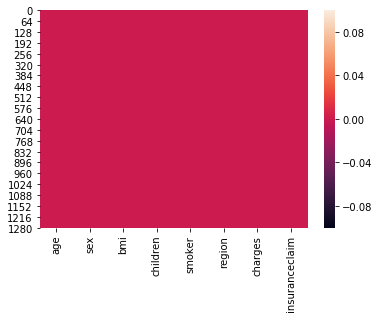

In [6]:
#to check weather any missing data is present or not
sns.heatmap(sbi.isnull())

#### Observations:

we can see above there is no null data is present in this data set

In [7]:
sbi.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [8]:
sbi.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In charges column there alot of outliers present.And for this life_insurance minimum age of persons is 18 and Maximum age of persons is 64.

In [9]:
#Cleansing Columns 
sbi.columns=['Age','Sex','BMI','Children','Smoker','Region','Charges','InsuranceClaim']

In [10]:
sbi.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges,InsuranceClaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


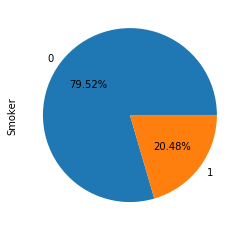

In [11]:
sbi['Smoker'].value_counts().plot.pie(autopct="%2.2f%%")

Non-Smokers % is approximately 80% of peoples are Non-smokers who took policy and 20 % of peoples are smokers .

Approximately 1340 persons are there ,these persons live in four different regions and to know in which reason most of the policy holder are there i'm going to use countplot

Text(0.5, 1.0, 'Regions')

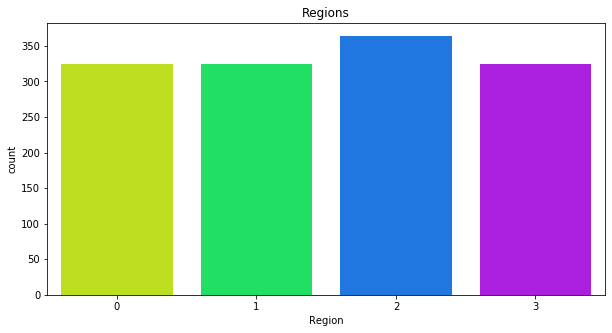

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(sbi['Region'],palette='hsv')
plt.title("Regions")

from you can see but it's not giving exact number 

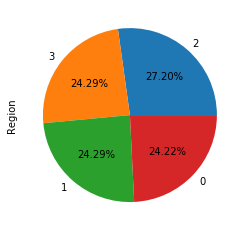

In [13]:
sbi['Region'].value_counts().plot.pie(autopct="%2.2f%%")

Only little bit difference among three regions 0,1 and 3 these three regions policy holders live equal percentage .Only in 2nd region policy holders live 27.20%

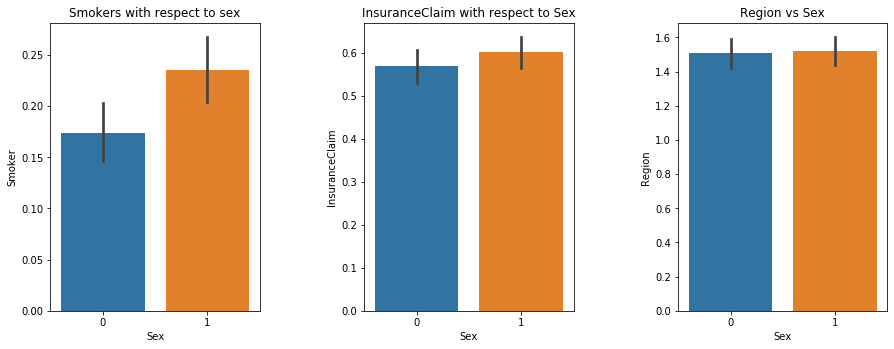

In [14]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Smokers with respect to sex')
sns.barplot(x="Sex", y="Smoker", data=sbi)
plt.subplot(132)
plt.title('InsuranceClaim with respect to Sex')
sns.barplot(x="Sex", y="InsuranceClaim", data=sbi)
plt.subplot(133)
plt.title('Region vs Sex')
sns.barplot(x="Sex", y="Region", data=sbi)

#### Observations:

Here observed one thing i.e Most of the peoples who smoke they are Males compared to Females.Higher number of Males are clamed Insurance compared to Females.

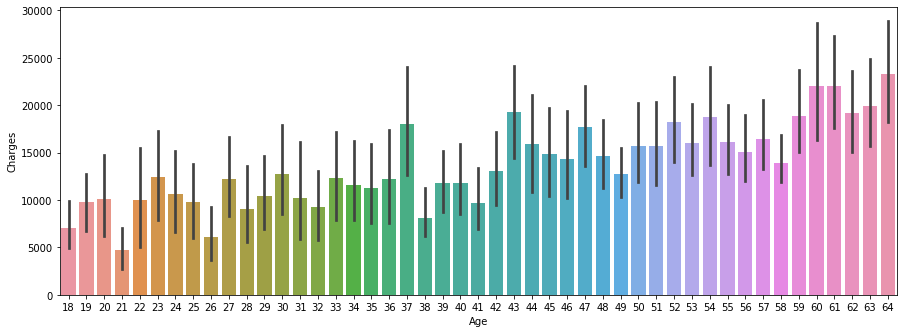

In [15]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
sns.barplot(x="Age", y="Charges", data=sbi)

from here we can observe one thing i.e is if age is increases then automatically charges are going to high 

and whose age is 21 those peoples Medical cost is low and whose age is above 60 Medical cost is high

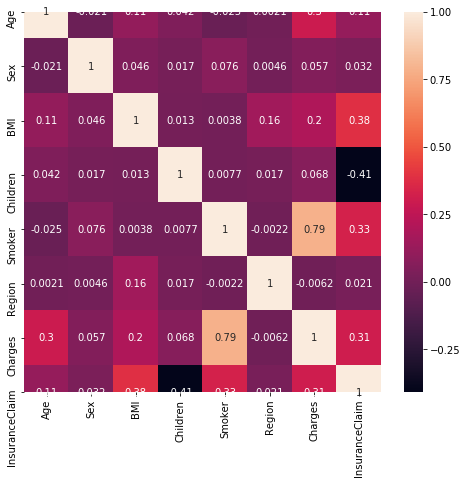

In [16]:
#to check Cor-relation
corr_hmap=sbi.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Insurance Claim for Children is very low and you may see above it's -0.41 and i think it's better to remove children columns

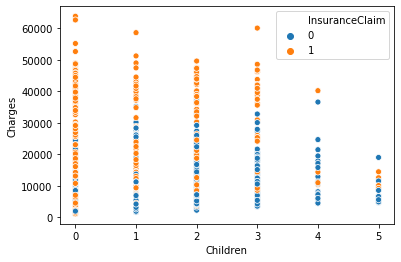

In [17]:
sns.scatterplot(x='Children',y='Charges',hue='InsuranceClaim',data =sbi)

It's clear that who have insurance claim number of dependent childrens are very less and if childrens are there for them medical cost minimum price is 0 and maximum charges is below 35000 

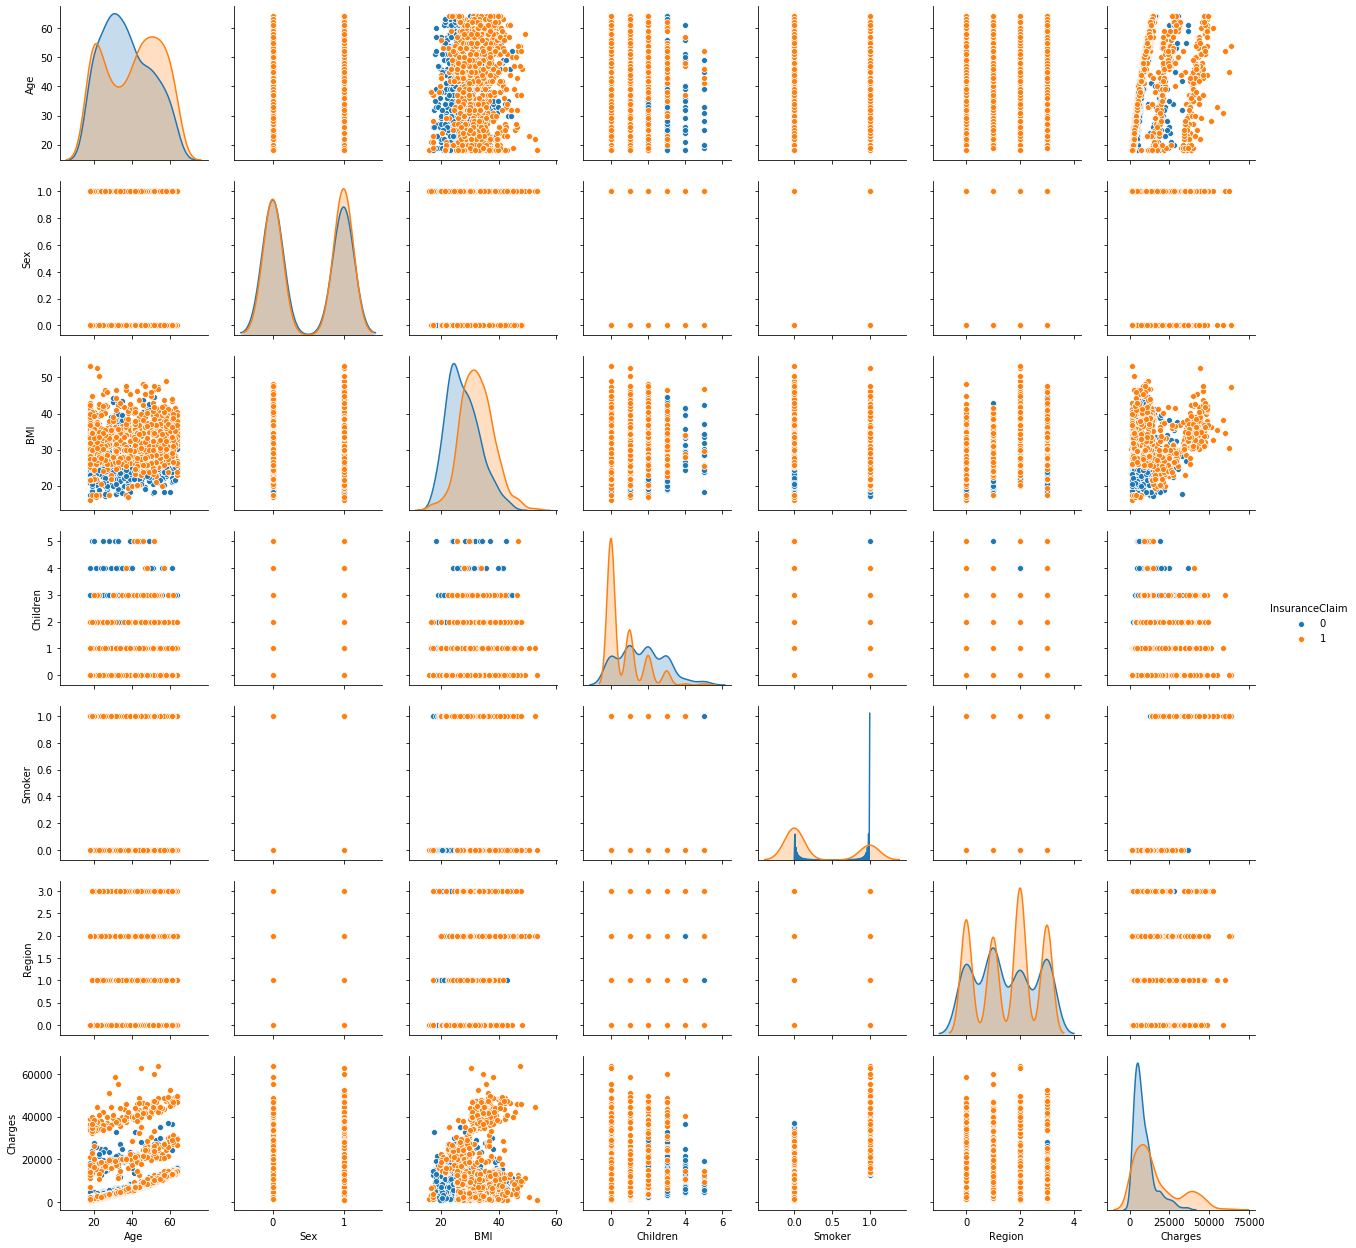

In [18]:
sns.pairplot(sbi ,hue ='InsuranceClaim', vars =['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Charges'])

# Identifying /Removing Outliers

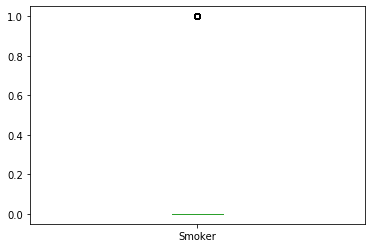

In [19]:
sbi['Smoker'].plot.box()

Age                  AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Sex               AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
BMI               AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Children          AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Smoker            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Region            AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Charges           AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
InsuranceClaim          AxesSubplot(0.125,0.125;0.0945122x0.343182)
dtype: object

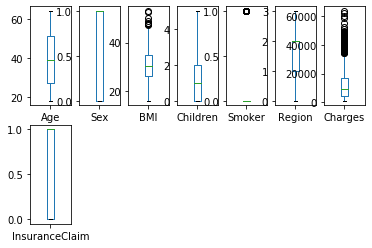

In [20]:
sbi.plot(kind='box',subplots=True,layout=(2,7))

In [21]:
#removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(sbi))
z

array([[1.43876426, 1.0105187 , 0.45332   , ..., 1.34390459, 0.2985838 ,
        0.84190989],
       [1.50996545, 0.98959079, 0.5096211 , ..., 0.43849455, 0.95368917,
        0.84190989],
       [0.79795355, 0.98959079, 0.38330685, ..., 0.43849455, 0.72867467,
        1.18777557],
       ...,
       [1.50996545, 1.0105187 , 1.0148781 , ..., 0.43849455, 0.96159623,
        0.84190989],
       [1.29636188, 1.0105187 , 0.79781341, ..., 1.34390459, 0.93036151,
        1.18777557],
       [1.55168573, 1.0105187 , 0.26138796, ..., 0.46691549, 1.31105347,
        0.84190989]])

In [22]:
threshold=3
np.where((z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2], dtype=int64))

It's perfect upto now

In [23]:
z[34][2]

0.9410580796656736

In [24]:
z[116][2]

3.0178611981425605

In [25]:
sbi_new=sbi[(z<3).all(axis=1)]#removing outliers

In [26]:
sbi.shape

(1338, 8)

In [27]:
sbi_new.shape

(1309, 8)

11 row had been deleted as outliers

## To Check Distribution of Skewness

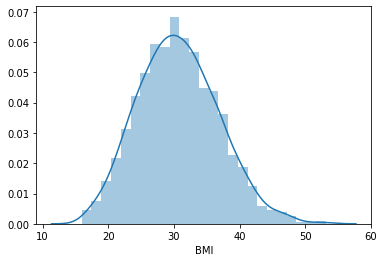

In [28]:
sns.distplot(sbi['BMI'])

In [29]:
collist=sbi.columns
ncol=7
nrows=5

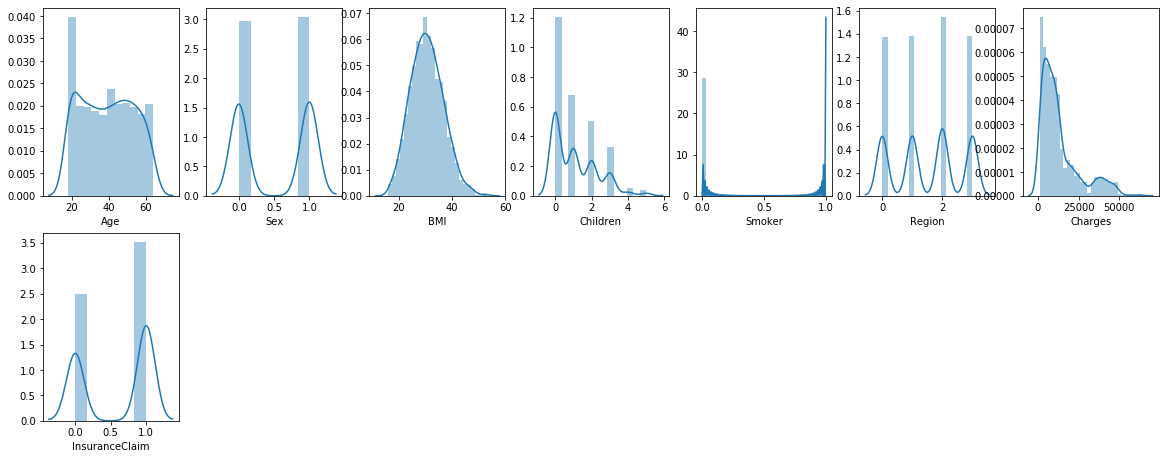

In [30]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(sbi[collist[i]])

In [31]:
sbi.skew()

Age               0.055673
Sex              -0.020951
BMI               0.284047
Children          0.938380
Smoker            1.464766
Region           -0.038101
Charges           1.515880
InsuranceClaim   -0.346254
dtype: float64

Need to remove skewness of these features by applying techniques.`

In [32]:
x=sbi.iloc[:,:-1]
x.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [33]:
y=sbi.iloc[:,-1:]
y.head()

,InsuranceClaim
0,1
1,1
2,0
3,0
4,1


In [34]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [35]:
x.skew()

Age         0.055673
Sex        -0.020951
BMI         0.284047
Children    0.264083
Smoker      1.464766
Region     -0.038101
Charges    -0.089817
dtype: float64

# Building  Machine Learning Model

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=46)

In [37]:
x.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,0,27.900,0.000000,0.693147,3,9.734236
1,18,1,33.770,0.693147,0.000000,2,7.453882
2,28,1,33.000,1.386294,0.000000,2,8.400763
3,33,1,22.705,0.000000,0.000000,1,9.998137
4,32,1,28.880,0.000000,0.000000,1,8.260455


In [38]:
y_train.shape

(1070, 1)

In [39]:
x_test.shape

(268, 7)

In [40]:
x.shape

(1338, 7)

In [41]:
y.shape

(1338, 1)

In [42]:
y_test.shape

(268, 1)

In [43]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()

In [44]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [45]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

************** DecisionTreeClassifier ***********


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


accuracy score 0.9589552238805971
Cross-val-score= 0.9812963923697022


roc_auc_score 0.954333617504973


              precision    recall  f1-score   support

           0       0.98      0.92      0.95       115
           1       0.94      0.99      0.96       153

    accuracy                           0.96       268
   macro avg       0.96      0.95      0.96       268
weighted avg       0.96      0.96      0.96       268



[[106   9]
 [  2 151]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


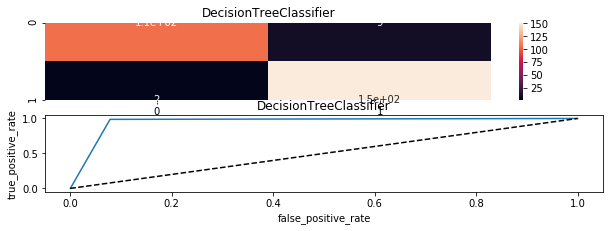

************** RandomForestClassifier ***********


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


accuracy score 0.9328358208955224
Cross-val-score= 0.9462091281560113


roc_auc_score 0.9336175049730038


              precision    recall  f1-score   support

           0       0.91      0.94      0.92       115
           1       0.95      0.93      0.94       153

    accuracy                           0.93       268
   macro avg       0.93      0.93      0.93       268
weighted avg       0.93      0.93      0.93       268



[[108   7]
 [ 11 142

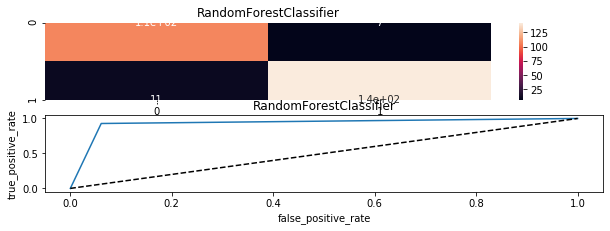

************** KNeighborsClassifier ***********


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


accuracy score 0.8544776119402985
Cross-val-score= 0.7690930374863649


roc_auc_score 0.8531116794543905


              precision    recall  f1-score   support

           0       0.82      0.84      0.83       115
           1       0.88      0.86      0.87       153

    accuracy                           0.85       268
   macro avg       0.85      0.85      0.85       268
weighted avg       0.86      0.85      0.85       268



[[ 97  18]
 [ 21 132]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


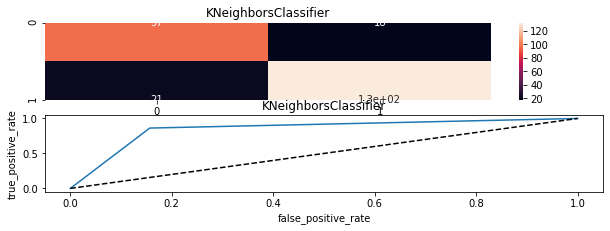

************** SGDClassifier ***********


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


accuracy score 0.8059701492537313
Cross-val-score= 0.7134152100460265


roc_auc_score 0.7890309747087241


              precision    recall  f1-score   support

           0       0.85      0.67      0.75       115
           1       0.79      0.91      0.84       153

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.79       268
weighted avg       0.81      0.81      0.80       268



[[ 77  38]
 [ 14 139]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


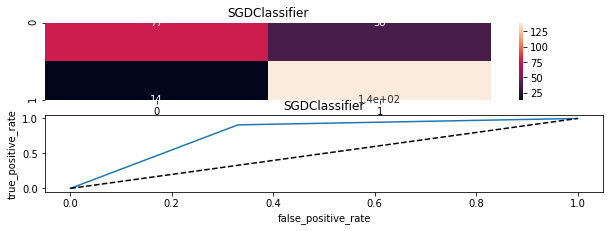

************** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy score 0.8544776119402985
Cross-val-score= 0.866215712879453


roc_auc_score 0.8487922705314009


              precision    recall  f1-score   support

           0       0.85      0.81      0.83       115
           1       0.86      0.89      0.87       153

    accuracy                           0.85       268
   macro avg       0.85      0.85      0.85       268
weighted avg       0.85      0.85      0.85       268



[[ 93  22]
 [ 17 136]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


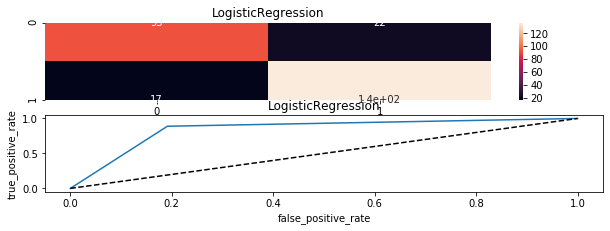

In [46]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))



#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv=model_selection.cross_val_score(model,x,y,cv=20,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

In [47]:
result=pd.DataFrame({'Model':Model,'cvs':cvs,'score':score,'rocscore':rocscore},columns=['Model','cvs','score','rocscore'])
result

,Model,cvs,score,rocscore
0,DecisionTreeClassifier,98.129639,95.895522,95.433362
1,RandomForestClassifier,94.620913,93.283582,93.361750
2,KNeighborsClassifier,76.909304,85.447761,85.311168
3,SGDClassifier,71.341521,80.597015,78.903097
4,LogisticRegression,86.621571,85.447761,84.879227


In [48]:
param_grid ={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
from sklearn.model_selection import GridSearchCV, cross_val_score
dct = DecisionTreeClassifier( random_state=1)
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(x_train, y_train)
grid.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.644, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.636, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.807, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.849, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.862, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.723, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.723, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.705, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.588, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.588, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.590, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.4s finished


{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [49]:
grid_predictions=grid.predict(x_test)
grid_predictions

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0], dtype=int64)

In [50]:
cn=confusion_matrix(y_test,grid_predictions)
cn

array([[110,   5],
       [ 19, 134]], dtype=int64)

In [51]:
accuracy_score(y_test,grid_predictions)

0.9104477611940298

# Predicting Values

In [52]:
pred=dtc.predict(x_test)
print('predicted insurance claim:',pred)
print('actual insurance claim',y_test)

predicted insurance claim: [1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1
 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0
 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1
 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1
 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0
 1 1 0 1 1 1 0 0 0]
actual insurance claim       InsuranceClaim
141                1
1065               0
467                0
557                1
166                0
...              ...
975                1
916                1
494                0
1006               0
1100               0

[268 rows x 1 columns]


# Saving Model

In [53]:
sbi_new=pd.DataFrame(pred)
sbi_new.to_csv('dtc_sbi.csv')

In [54]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(dtc,'sbi_life.obj')
#load the model from a file
dct_from_joblib=joblib.load('sbi_life.obj')
#use the loaded model to make prediction
dct_from_joblib.predict(x_test)

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0], dtype=int64)